In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

basepath = Path("/scratch/crobin/earthnet2023/")
train_paths = list(basepath.glob("train/*/*.nc"))
interpolated_paths = list(Path("/scratch/crobin/earthnet2023_interpolated/").glob("train/*/*.nc"))

print("len interpolated set:", len(interpolated_paths))

len interpolated set: 100


In [8]:
filepath = interpolated_paths[2]
name = str(filepath)[-12:]
train_path = list(basepath.glob("train/*/" + name))[0]
print(train_path)

/scratch/crobin/earthnet2023/train/Algeria/31SCT2107.nc


In [3]:
minicube = xr.open_dataset(filepath)
time = [minicube.time.values[i] for i in range(4, 450, 5)]
data = minicube.s1_vv #s2_B07.sel(time=time)

In [4]:
temporal_variables = [
        "era5land_t2m_mean",
        "era5land_pev_mean",
        "era5land_slhf_mean",
        "era5land_ssr_mean",
        "era5land_sp_mean",
        "era5land_sshf_mean",
        "era5land_e_mean",
        "era5land_tp_mean",
        "era5land_t2m_min",
        "era5land_pev_min",
        "era5land_slhf_min",
        "era5land_ssr_min",
        "era5land_sp_min",
        "era5land_sshf_min",
        "era5land_e_min",
        "era5land_tp_min",
        "era5land_t2m_max",
        "era5land_pev_max",
        "era5land_slhf_max",
        "era5land_ssr_max",
        "era5land_sp_max",
        "era5land_sshf_max",
        "era5land_e_max",
        "era5land_tp_max",
        "era5_e",
        "era5_pet",
        "era5_pev",
        "era5_ssrd",
        "era5_t2m",
        "era5_t2mmax",
        "era5_t2mmin",
        "era5_tp",
        "sg_bdod_top_mean",
        "sg_bdod_sub_mean",
        "sg_cec_top_mean",
        "sg_cec_sub_mean",
        "sg_cfvo_top_mean",
        "sg_cfvo_sub_mean",
        "sg_clay_top_mean",
        "sg_clay_sub_mean",
        "sg_nitrogen_top_mean",
        "sg_nitrogen_sub_mean",
        "sg_phh2o_top_mean",
        "sg_phh2o_sub_mean",
        "sg_ocd_top_mean",
        "sg_ocd_sub_mean",
        "sg_sand_top_mean",
        "sg_sand_sub_mean",
        "sg_silt_top_mean",
        "sg_silt_sub_mean",
        "sg_soc_top_mean",
        "sg_soc_sub_mean",
    ]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



                10 - Tree cover
                20 - Shrubland
                30 - Grassland
                40 - Cropland
                50 - Built-up
                60 - Bare / sparse vegetation
                70 - Snow and Ice
                80 - Permanent water bodies
                90 - Herbaceous wetland
                95 - Mangroves
                100 - Moss and lichen
                


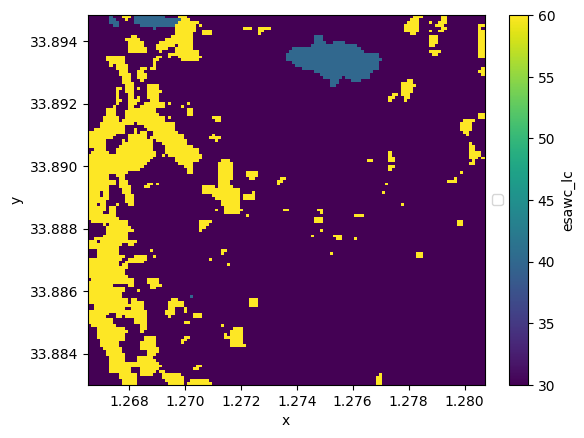

In [9]:
from scipy import interpolate
data = minicube.esawc_lc
#xi = np.arange(data.shape[0])[mask]
yi = data #.values[mask]
print(yi.classes)
# xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
#interp = interpolate.interp1d(xi, yi, kind = "linear")

#x = np.arange(len(xi)) 
#y = interp(x)
#plt.plot(xi, yi, 'o', label = "$Pi$")
# plt.plot(x, y, "-", label = "Cubic")
yi.plot()
#plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

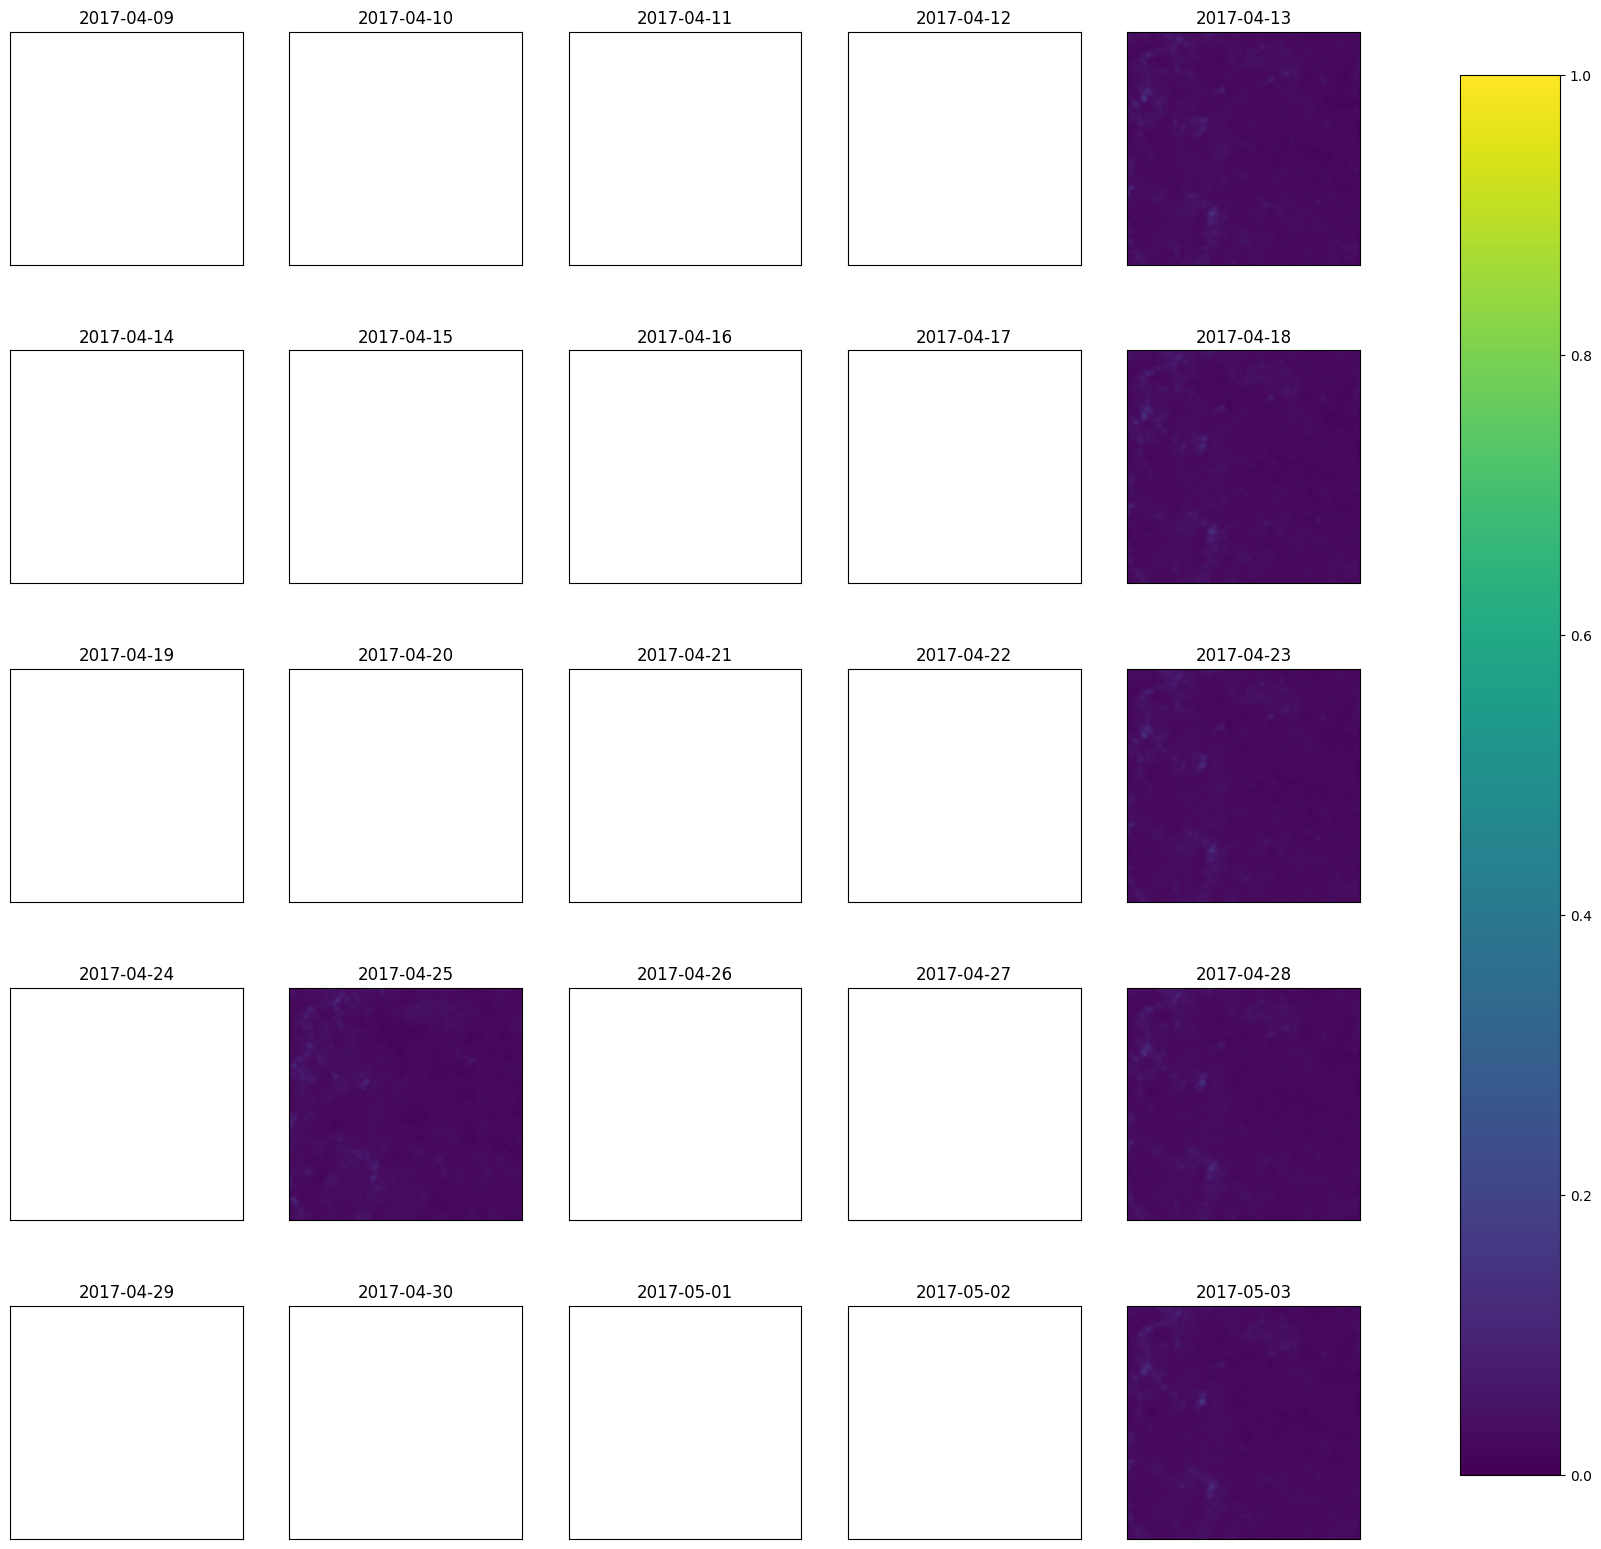

In [32]:
# data = minicube.s2_B02.sel(time=time)
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 50
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(data.isel(time=t).time.dt.date.values)
        im = axes[i,j].imshow(data.isel(time=t), vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

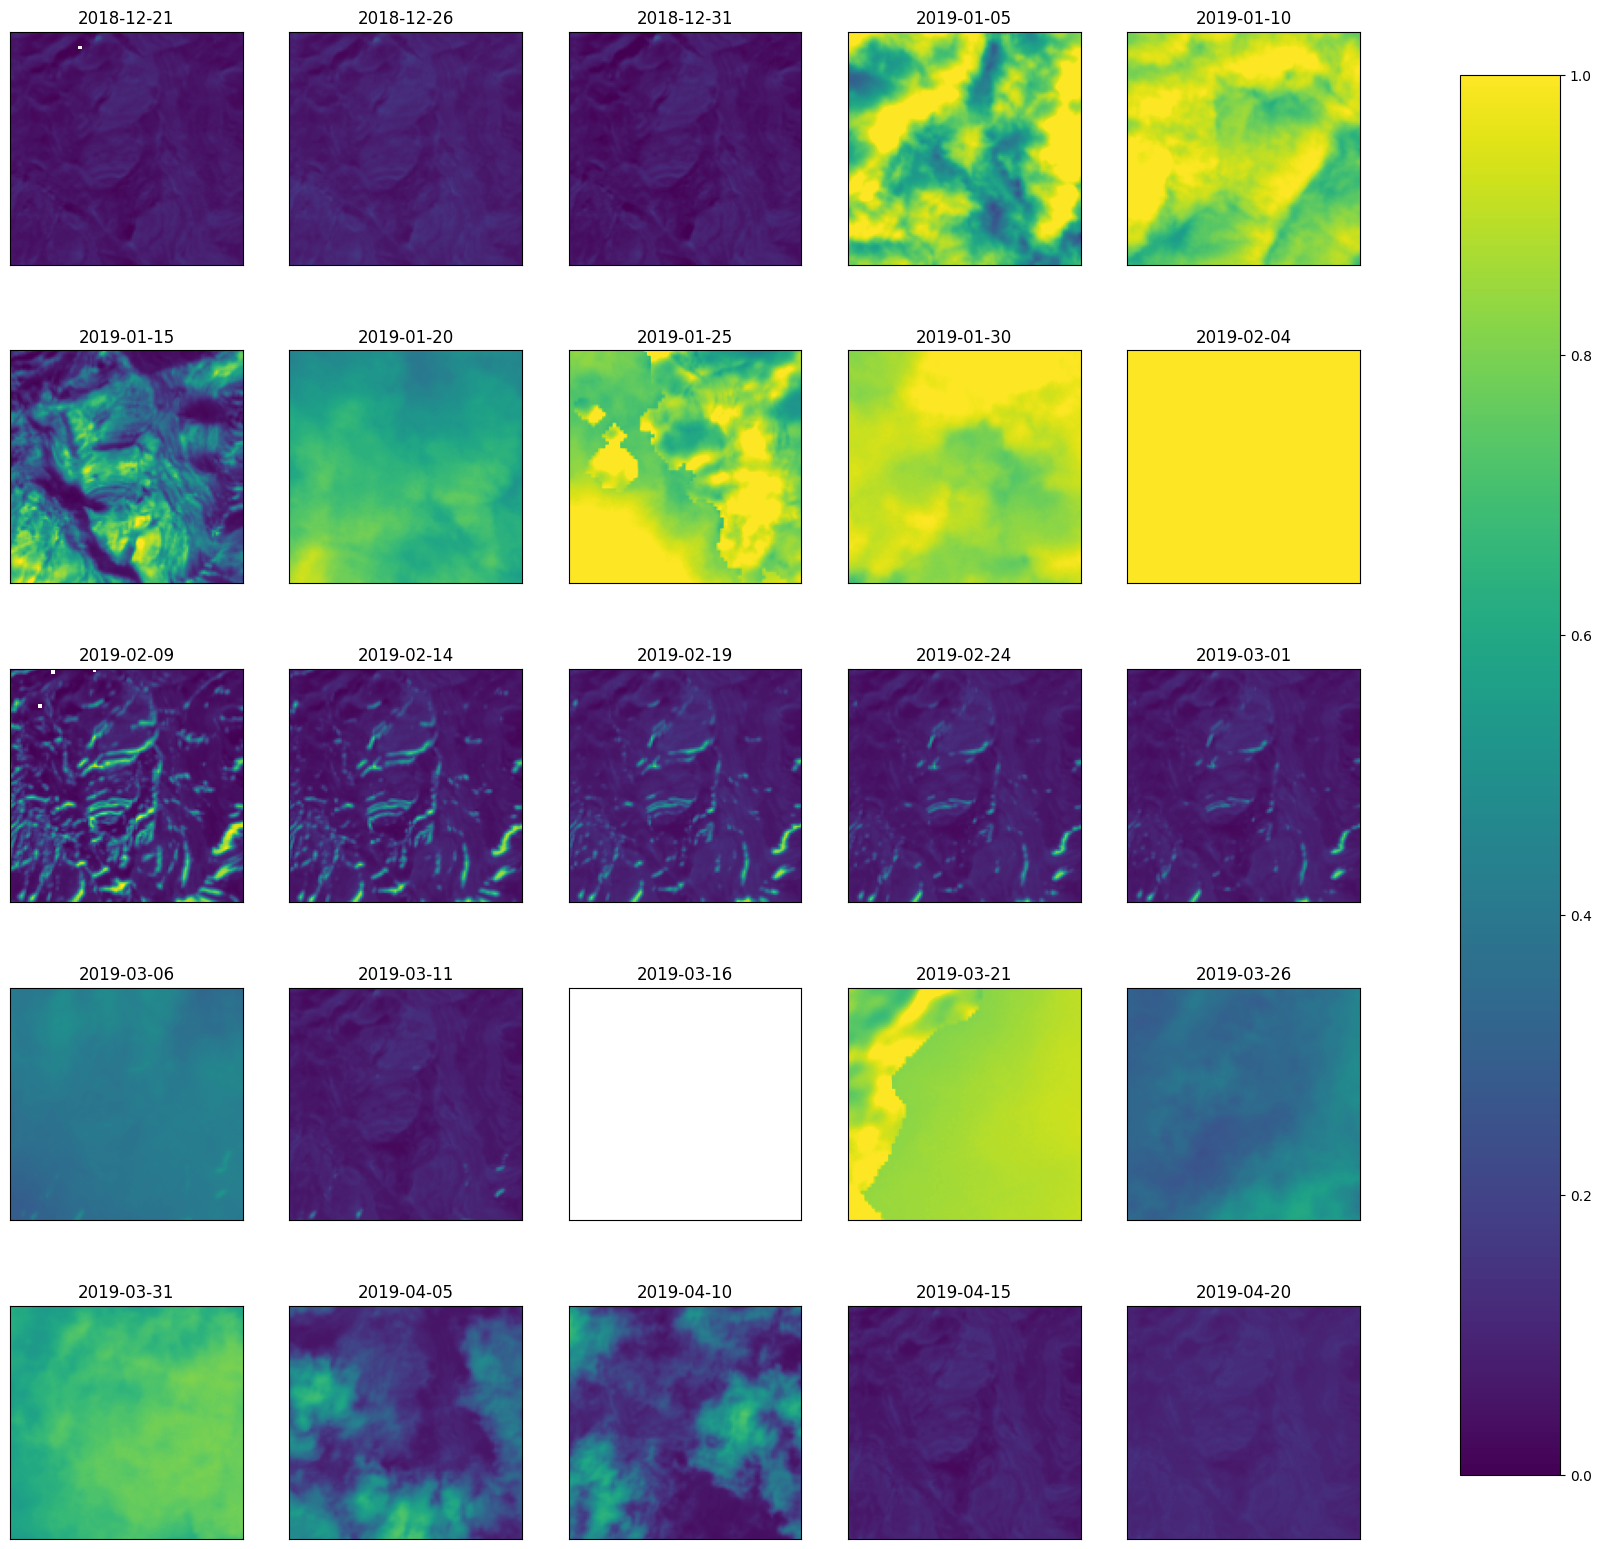

In [28]:
minicube = xr.open_dataset(train_path)
time = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=time).values < 1.0)
s2_cube = minicube.s2_B02.sel(time=time)
data = s2_cube #* mask
# data = np.where(data == 0, np.nan, data)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(data.isel(time=t).time.dt.date.values)
        im = axes[i,j].imshow(data.isel(time=t), vmin=0, vmax=1)
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)